# Problem Statement 

- Consider Census income dataset available at https://archive.ics.uci.edu/ml/datasets/Census+Income
- Define potential problems that can be addressed using the machine learning techniques you have learnt.
- Formulate the problem in terms of supervised learning with justifications and perform activities such as preparing the dataset for analysis
- investigating the relationships in the data set with visualization
- creating a model
- evaluating the performance of the classification model.


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship",
           "race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

In [3]:
training_data = pd.read_csv('adult-data', names=columns)
test_data = pd.read_csv('adult-test', names=columns)

# Exploratory data analysis 

In [4]:
#shape of training and test data
print('Training data : {}'.format(training_data.shape))
print('Test data : {}'.format(test_data.shape))

Training data : (32561, 15)
Test data : (16281, 15)


In [5]:
#feature information
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
training_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
training_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#null
training_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
#?
training_data.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

### Observation :

- No vull values present
- missing values are represented by '?'

# Data set visualization

## Education

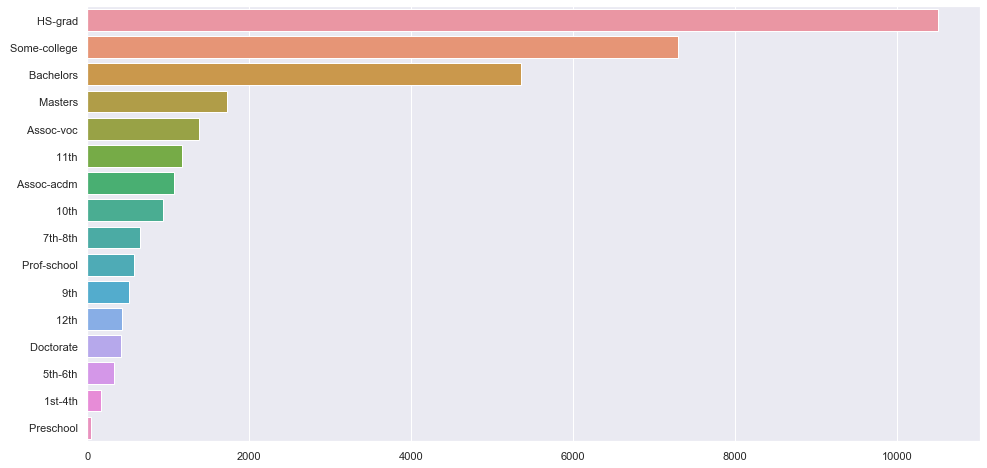

In [10]:
education_info = training_data['education'].value_counts()

sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(education_info.values, education_info.index)

## Income

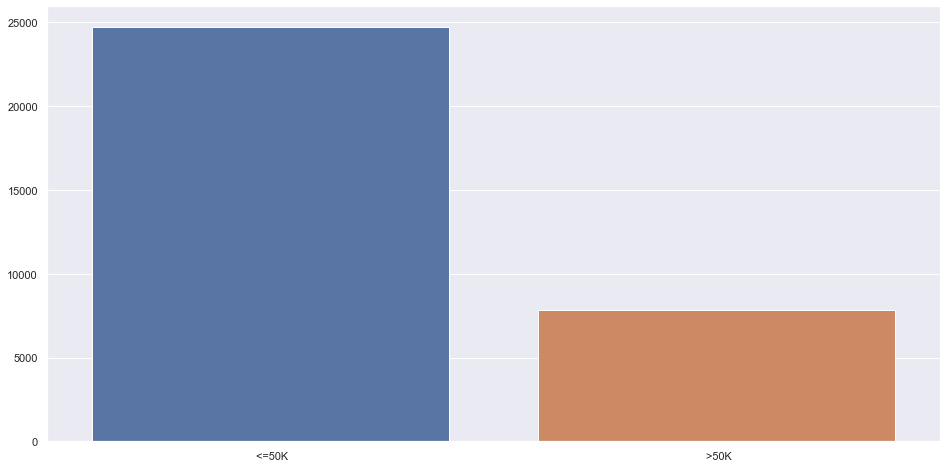

In [11]:
income_info = training_data['income'].value_counts()

sns.barplot(income_info.index, income_info.values)

## Age

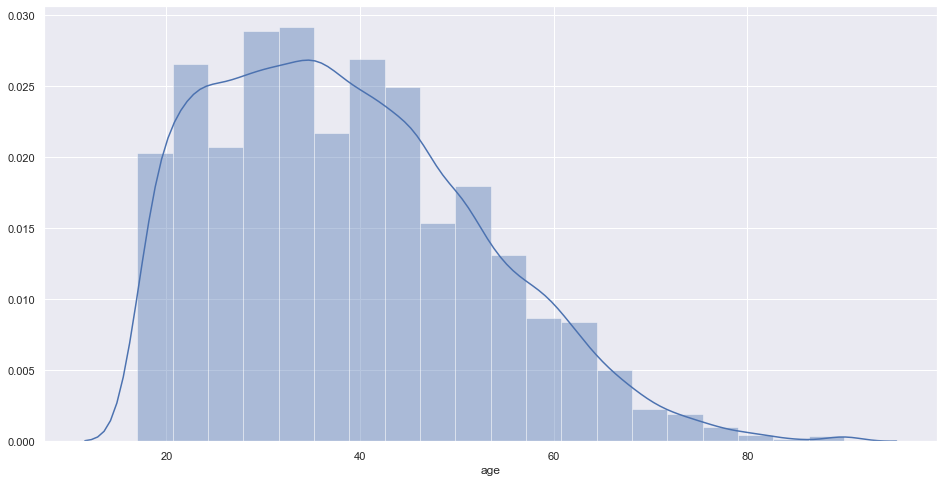

In [12]:
sns.distplot(training_data['age'], bins=20)

## Marital status

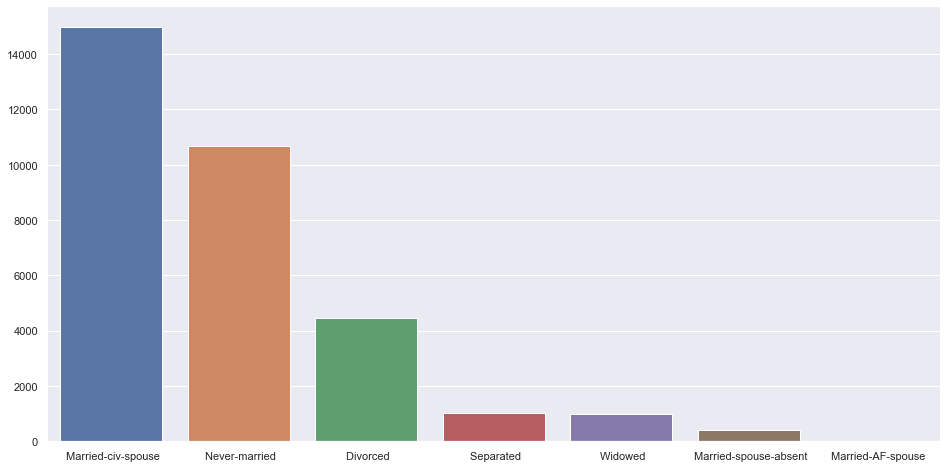

In [13]:
mstatus_info = training_data['marital-status'].value_counts()

sns.barplot(mstatus_info.index, mstatus_info.values)

## Sex

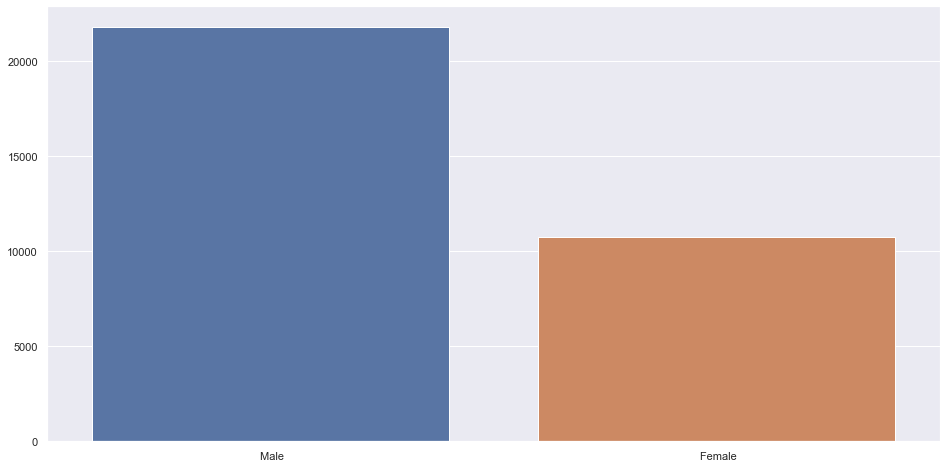

In [14]:
sex_info = training_data['sex'].value_counts()

sns.barplot(sex_info.index, sex_info.values)

## Income - Education distribution

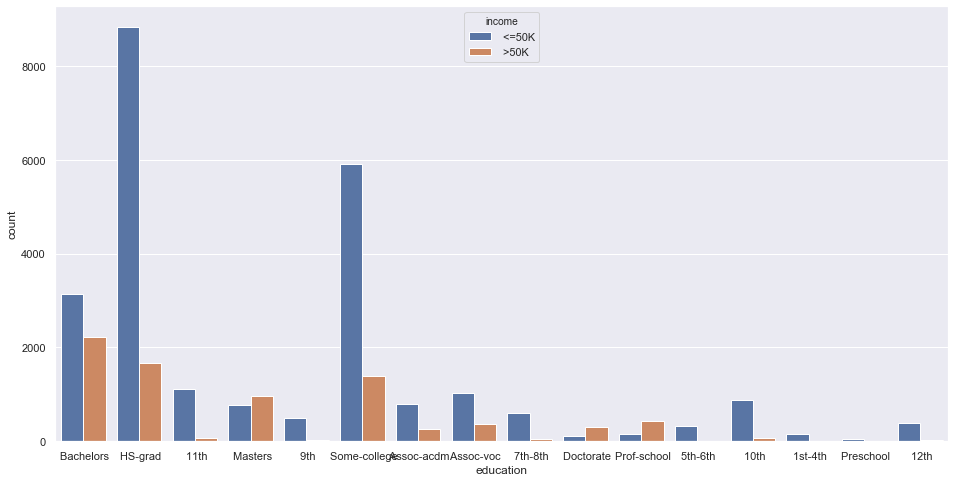

In [15]:
sns.countplot(training_data['education'], hue=training_data['income'])

## Income - Age distribution

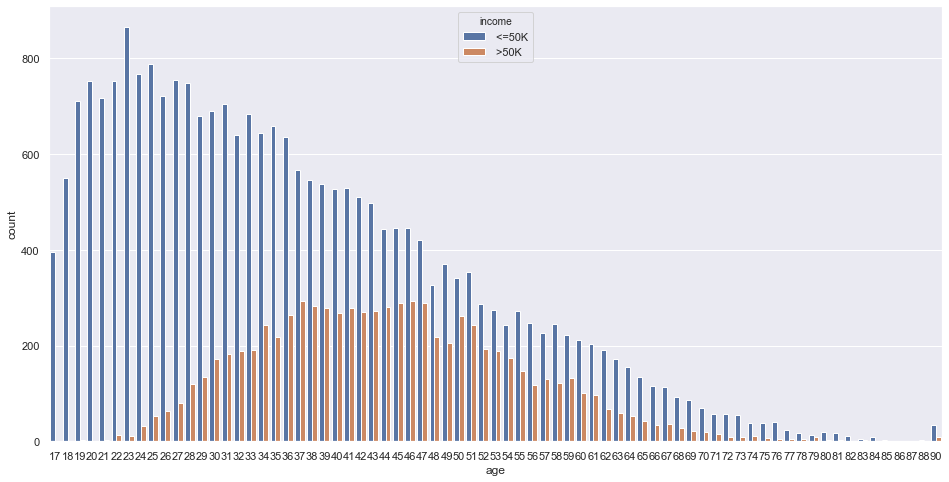

In [16]:
sns.countplot(training_data['age'], hue=training_data['income'])

## Income - Marital status distribution

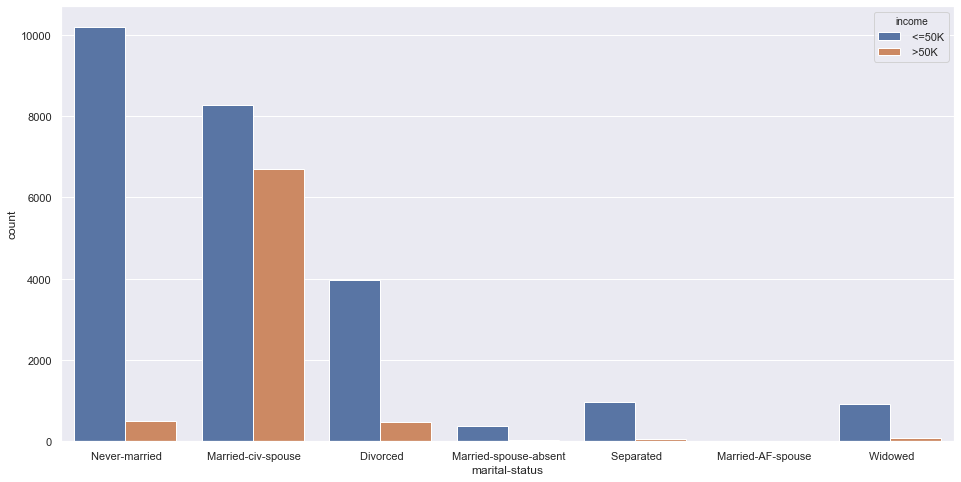

In [17]:
sns.countplot(training_data['marital-status'], hue=training_data['income'])

## Income - Sex distribution

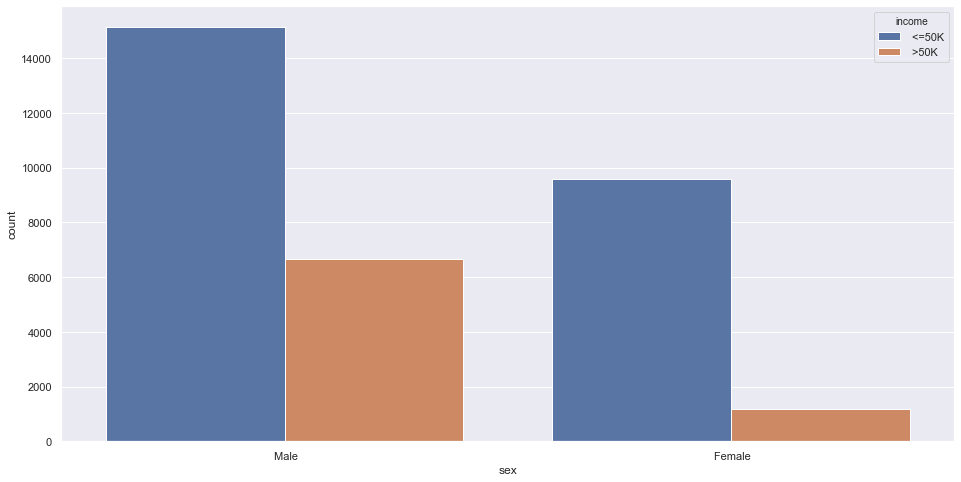

In [18]:
sns.countplot(training_data['sex'], hue=training_data['income'])

## Pair plots

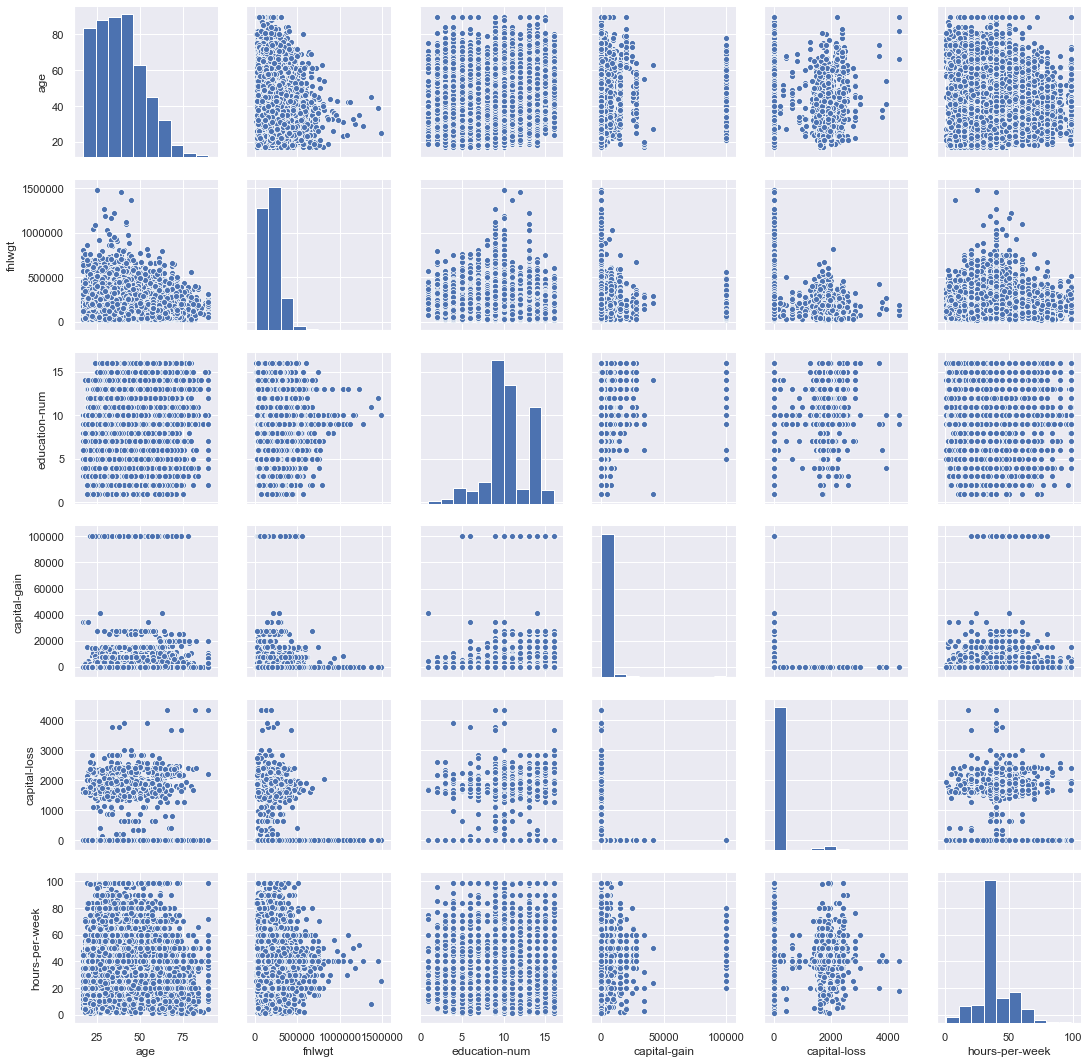

In [19]:
sns.pairplot(training_data)

# Preprocess the data

## Replace '?' with nan

In [20]:
training_data = training_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
training_data[training_data == '?'] = np.nan

test_data = test_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
test_data[test_data == '?'] = np.nan

## Replace . from income column of test data

In [21]:
test_data['income'] = test_data['income'].str.strip('.')

## Replace nan with mode

In [22]:
for col in ['workclass', 'occupation', 'native-country']:
    training_data[col].fillna(training_data[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

## extract feature vector and target variable

In [23]:
X_training_data = training_data.drop(['income'], axis=1)
y_training_data = training_data['income']

X_test_data = test_data.drop(['income'], axis=1)
y_test_data = test_data['income']

## Feature Engineering - Label Encoding

In [24]:
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_training_data[feature] = le.fit_transform(X_training_data[feature]) #fit and transform for training data
        X_test_data[feature] = le.transform(X_test_data[feature]) #Only transform for test data

## Feature scaling

In [25]:
scaler = StandardScaler()
X_training_data = pd.DataFrame(scaler.fit_transform(X_training_data), 
                               columns = X_training_data.columns)      #fit and transform for training data
X_test_data = pd.DataFrame(scaler.transform(X_test_data), 
                           columns = X_test_data.columns)              #Only transform for test data

# Train and test model 

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=1)
randomForest.fit(X_training_data, y_training_data)

rf_y_predicted_data = randomForest.predict(X_test_data)

rf_accuracy = accuracy_score(y_test_data, rf_y_predicted_data)

print('Random Forest report card with all the features:')
print(classification_report(y_test_data, rf_y_predicted_data))

Random Forest report card with all the features:
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     12435
        >50K       0.72      0.57      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



## Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_training_data, y_training_data)
lr_y_predicted_data = logreg.predict(X_test_data)

lr_accuracy = accuracy_score(y_test_data, lr_y_predicted_data)

print('Logistic Regression accuracy score with all the features:')
print(classification_report(y_test_data, lr_y_predicted_data))

Logistic Regression accuracy score with all the features:
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89     12435
        >50K       0.71      0.45      0.55      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.70      0.72     16281
weighted avg       0.81      0.83      0.81     16281



## KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(X_training_data, y_training_data)
knn_y_predicted_data = neigh.predict(X_test_data)

knn_accuracy = accuracy_score(y_test_data, knn_y_predicted_data)

print('K Neighbors Classifier report card with all the features:')
print(classification_report(y_test_data, knn_y_predicted_data))

K Neighbors Classifier report card with all the features:
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89     12435
        >50K       0.66      0.58      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.74      0.75     16281
weighted avg       0.82      0.83      0.82     16281



## Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_training_data, y_training_data)
dt_y_predicted_data = dt.predict(X_test_data)

dt_accuracy = accuracy_score(y_test_data, dt_y_predicted_data)

print('Decision Tree Classifier report card with all the features:')
print(classification_report(y_test_data, dt_y_predicted_data))

Decision Tree Classifier report card with all the features:
              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87     12435
        >50K       0.59      0.62      0.60      3846

    accuracy                           0.81     16281
   macro avg       0.74      0.74      0.74     16281
weighted avg       0.81      0.81      0.81     16281



## Support Vector Machine

In [30]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_training_data, y_training_data)
svm_y_predicted_data = svm.predict(X_test_data)

svm_accuracy = accuracy_score(y_test_data, svm_y_predicted_data)

print('Support Vector Machine report card with all the features:')
print(classification_report(y_test_data, svm_y_predicted_data))

Support Vector Machine report card with all the features:
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91     12435
        >50K       0.76      0.55      0.63      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



## Gaussian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_training_data, y_training_data)
gnb_y_predicted_data = gnb.predict(X_test_data)

gnb_accuracy = accuracy_score(y_test_data, gnb_y_predicted_data)

print('Gaussian Naive Bayes report card with all the features:') 
print(classification_report(y_test_data, gnb_y_predicted_data))

Gaussian Naive Bayes report card with all the features:
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88     12435
        >50K       0.67      0.34      0.46      3846

    accuracy                           0.81     16281
   macro avg       0.75      0.65      0.67     16281
weighted avg       0.79      0.81      0.78     16281



## Stochastic Gradient Descent

In [32]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_training_data, y_training_data)
sgd_y_predicted_data = sgd.predict(X_test_data)

sgd_accuracy = accuracy_score(y_test_data, sgd_y_predicted_data)

print('Stochastic Gradient Descent report card with all the features:')
print(classification_report(y_test_data, sgd_y_predicted_data))

Stochastic Gradient Descent report card with all the features:
              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89     12435
        >50K       0.74      0.42      0.53      3846

    accuracy                           0.83     16281
   macro avg       0.79      0.69      0.71     16281
weighted avg       0.82      0.83      0.81     16281



## XGB Classifier

In [33]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_training_data, y_training_data)
xgb_y_predicted_data = xgb.predict(X_test_data)

xgb_accuracy = accuracy_score(y_test_data, xgb_y_predicted_data)

print('XGB report card with all the features:')
print(classification_report(y_test_data, xgb_y_predicted_data))

XGB report card with all the features:
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.92     12435
        >50K       0.79      0.58      0.67      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.77      0.79     16281
weighted avg       0.86      0.87      0.86     16281



# Performance evaluation

In [34]:
result_data = [['Random Forest', round(rf_accuracy*100,2)],['Logistic Regression',round(lr_accuracy*100,2)],
               ['KNN Classifier', round(knn_accuracy*100,2)],['Decision Tree Classifier', round(dt_accuracy*100,2)],
               ['Support Vector Machine', round(svm_accuracy*100,2)],['XGB Classifier', round(xgb_accuracy*100,2)],
               ['Stochastic Gradient Descent',round(sgd_accuracy*100,2)],['Gaussian Naive Bayes', round(gnb_accuracy*100,2)]]

pd.DataFrame(result_data, columns=["Algorithm", "Accuracy"])

,Algorithm,Accuracy
0,Random Forest,84.57
1,Logistic Regression,82.55
2,KNN Classifier,82.86
3,Decision Tree Classifier,80.95
4,Support Vector Machine,85.12
5,XGB Classifier,86.58
6,Stochastic Gradient Descent,82.75
7,Gaussian Naive Bayes,80.59


# Model tunning

## XGB Classifier

In [35]:
xgb = XGBClassifier(
                      silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.02,  
                      colsample_bytree = 0.4,
                      subsample = 0.9,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=0
                   )

eval_set = [(X_training_data, y_training_data), (X_test_data, y_test_data)]
eval_metric = ["auc","error"]

xgb.fit(X_training_data, y_training_data, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

xgb_y_predicted_data = xgb.predict(X_test_data)

new_xgb_accuracy = accuracy_score(y_test_data, xgb_y_predicted_data)

print('XGB report card with all the features:')
print(classification_report(y_test_data, xgb_y_predicted_data))

XGB report card with all the features:
              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92     12435
        >50K       0.78      0.65      0.71      3846

    accuracy                           0.88     16281
   macro avg       0.84      0.80      0.82     16281
weighted avg       0.87      0.88      0.87     16281



In [36]:
pd.DataFrame([['XGB Classifier', round(new_xgb_accuracy*100,2)]], columns=["Algorithm", "Accuracy"])

,Algorithm,Accuracy
0,XGB Classifier,87.58
